# **Previsão de Consumo de Cerveja**
O projeto desse curso é desenvolver um modelo de Machine Learning utilizando a técnica de Regressão Linear, visando obter um modelo de previsão do consumo médio de cerveja baseado nos parâmetros julgados como relevantes para o problema.


## Bibliotecas

In [1]:
# Manipulação dos dados
import pandas as pd
import numpy as np

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
# Separar os dados de treino e de teste
from sklearn.model_selection import train_test_split
# Regressão linear
from sklearn.linear_model import LinearRegression
# Gerar as métricas do modelo
from sklearn import metrics

# Salvar o modelo criado
import pickle

# Remover os avisos
import warnings
warnings.filterwarnings('ignore')

## Configuração de estilo da biblioteca seaborn

In [2]:
# pallete
sns.set_palette('Accent')

# style
sns.set_style('darkgrid')

## Leitura dos dados

In [3]:
dados = pd.read_csv('Consumo_cerveja.csv', sep=';')

In [4]:
# Visualizando os dados
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


Os dados do dataset acima foram retirados do Kaggle e foram coletados São Paulo, em uma área universária, onde existem festas com grupos de alunos de 18 a 28 anos em média.

No dataset tem-se dados referentes a data, temperatura média, temperatura mínima, temperatura máxima, precipitação em mm, se é final de semana ou não (1 - sim, 0 - não) e o consumo em litros de cerveja.

In [5]:
# Tamanho do dataset
dados.shape

(365, 7)

## Análises Preliminares

### Estatísticas descritivas

In [6]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


### Matriz de correlação

**O que é uma matriz de correlação?**

Iniciando com o conceito de correlação, que é uma associação estatística que avalia o grau pelo qual um par de variáveis estão linearmente relacionadas. A correlação pode ser positiva (o aumento de uma variável é acompanhado do aumento da outra) ou negativa (o aumento de uma variável é acompanhado da diminuição da outra), sendo que o valores variam de -1 a +1. Então, a matriz de correlação tem a finalidade de entender as relações entre variáveis e é fundamental que faça parte da análise exploratória.

Fonte: https://www.numerapeopleanalytics.com/blog/tutorial-matriz-de-correlao

In [7]:
# Criando a matriz
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


O motivo da diagonal da matriz apresentar correlação igual a 1.0 é por conta de estar avaliando uma variável com ela mesma, por isso, indica que há uma associação perfeitamente positiva.

## Comportamento da variável dependente (Y)

A variável dependente é o consumo.

### Análise gráfica

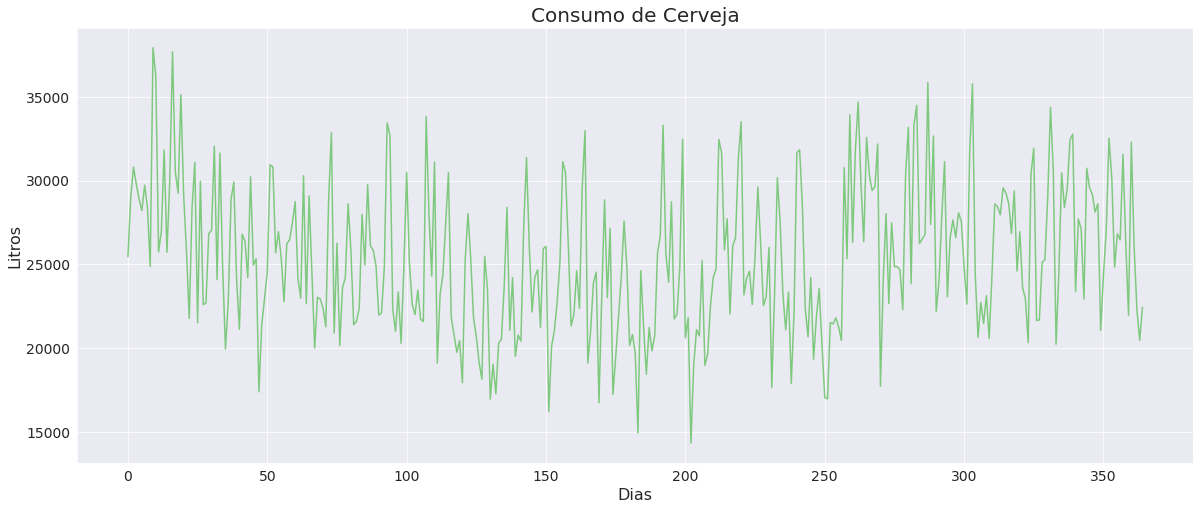

In [8]:
# Plotando a variável dependendo (y)
fig, ax = plt.subplots(figsize=(20,8))

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_xlabel('Dias', fontsize=16)
ax.set_ylabel('Litros', fontsize=16)
ax = dados['consumo'].plot(fontsize=14)

Através do gráfico é possível observar que há uma grande oscilação no consumo de cerveja ao longo de todo período, isso pode estar relacionado ao fato de haver um consumo significativamente maior aos finais de semana.

Outro ponto é que aproximadamente no meio do período o consumo parece ser relativamente menor, isso por estar relacionado ao fato de ser uma época mais fria do ano.

## Box plot

Analisando o boxplot obtém-se as seguintes informações do conjunto de dados: mediana, primeiro quartil, terceiro quartil, menor valor e maior valor.

Com o boxplot visualiza-se o centro, a dispersão e a assimetria de um conjunto de dados. Também é muito útil para identificar e controlar valores extremos, que são os chamados outliers, e para identificar o valor que melhor representa os dados, que é a mediana. Outra função dele é comparar diferentes distribuições dados.

Fonte: https://oestatistico.com.br/boxplot-a-caixa-magica/

### Box plot da variável dependente (y)

Text(0.5, 0, 'Litros')

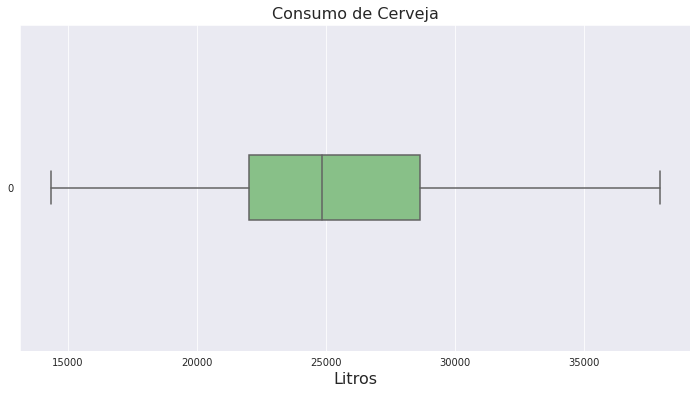

In [9]:
ax = sns.boxplot(data=dados['consumo'], orient='h', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=16)
ax.set_xlabel('Litros', fontsize=16)

O boxplot *'Consumo de Cerveja'* mostra que o valor que melhor reprenta esse consumo em litros (mediana) está em torno de 25.000.

## Box plot com duas variáveis

Investigando a variável dependente (y) segundo uma determinada característica

### Fim de semana

Text(0.5, 0, 'Litros')

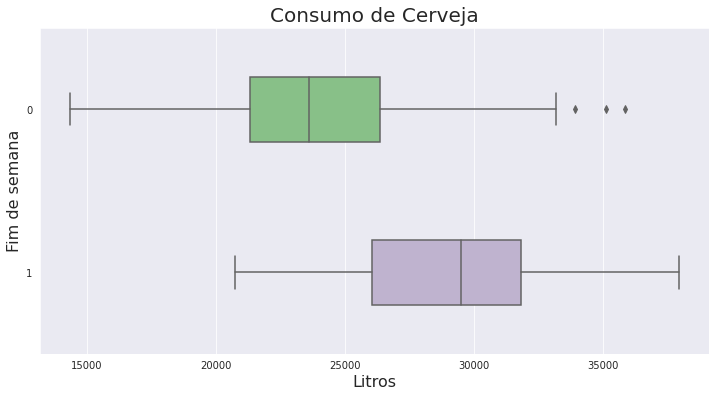

In [10]:
ax = sns.boxplot(x=dados['consumo'], y=dados['fds'], orient='h', width=0.4)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Fim de semana', fontsize=16)
ax.set_xlabel('Litros', fontsize=16)

No gráfico acima compara-se a distribuição do consumo de cerveja quando é final de semana e quando não é. Pode-se concluir que o consumo é significativamente maior aos finais de semana. Um ponto de atenção para o boxplot com os dados do meio da semana é que ele apresenta outliers, isso pode estar relacionado a feriados que caíram no meio da semana e fizeram o consumo ser maior nesses dias.

## Distribuição de frequências

Distribuição de frequências da variável dependente (y)

### Histograma

O histograma é um gráfico de barras que demonstra a distribuição de frequências, no qual a base das barras representa uma classe e a altura a quantidade ou frequência absoluto com que o valor de cada classe ocorre. É usado para dados contínuos, diferentemente, de um gráfico de barras e é útil porque facilita muito a visualização, mostrando de forma visual onde a maioria dos valores se concentram e como se da a distribuição dos dados.

Fonte: https://www.alura.com.br/artigos/o-que-e-um-histograma

Text(0.5, 0, 'Consumo de Cerveja (L)')

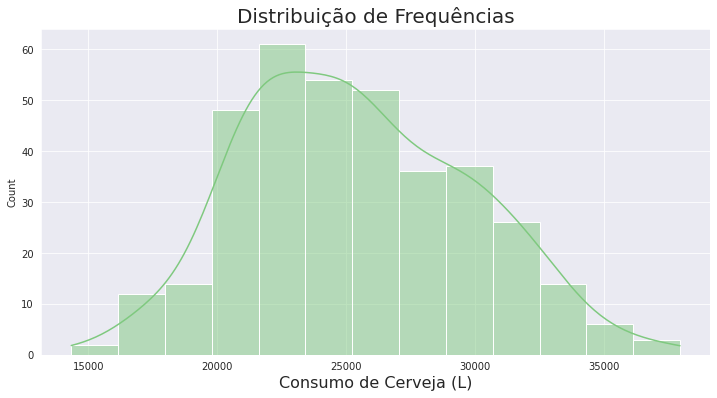

In [11]:
ax = sns.histplot(dados['consumo'], kde=True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Consumo de Cerveja (L)', fontsize=16)

## Variável Dependente x Variáveis Explicativas

Construindo gráficos de dispersão entre as variáveis do dataset

### pairplot
Plota o relacionamento entre pares de variáveis de um dataset

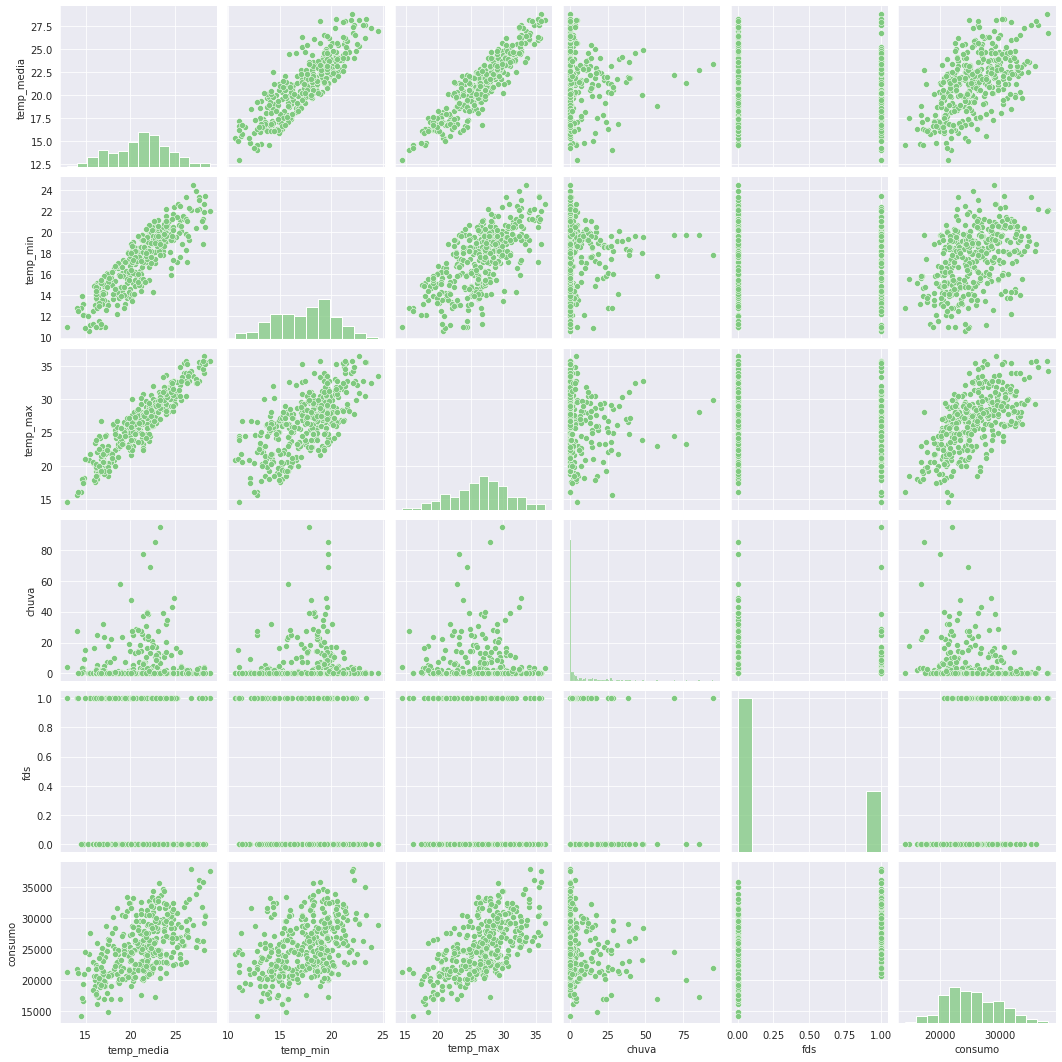

In [12]:
ax = sns.pairplot(dados)

Como deseja-se comparar a variável dependente (consumo) com as demais variávies, será feita uma seleção dos gráficos de dispersão desejados a seguir para melhorar a visualização.

Text(0.5, 1.1, 'Dispersão entre as Variáveis')

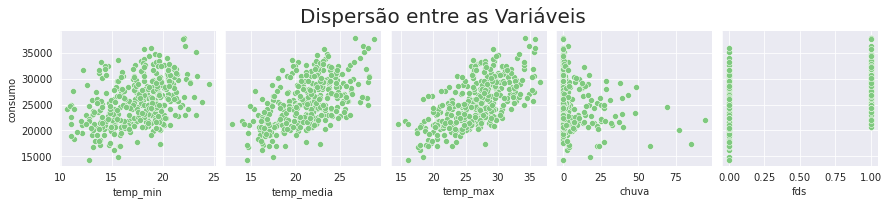

In [13]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.1)

Adicionando uma estimativa da reta de regressão.

Text(0.5, 1.1, 'Dispersão entre as Variáveis')

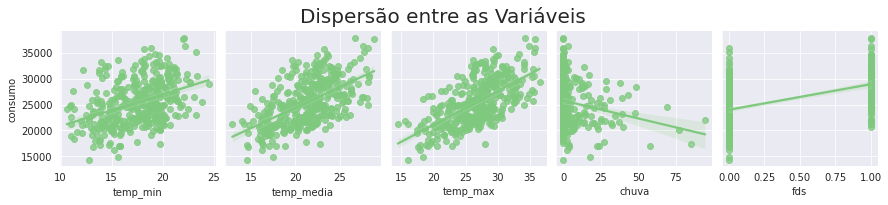

In [14]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.1)

### jointplot
Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.

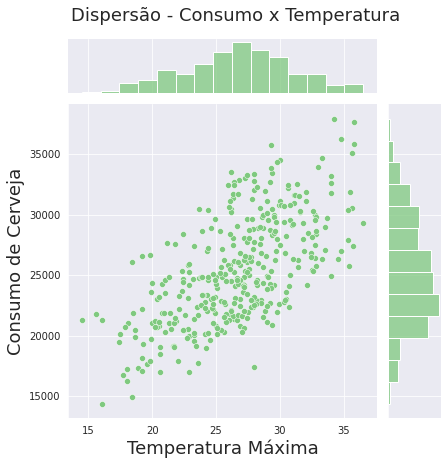

In [15]:
ax = sns.jointplot(x='temp_max', y='consumo', data=dados)
ax.fig.suptitle('Dispersão - Consumo x Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels('Temperatura Máxima', 'Consumo de Cerveja', fontsize=18)

Na parte superior do gráfico é a distribuição de frequência da temperatura máxima e do lado direito do consumo de cerveja.

Adicionando uma estimativa da reta de regressão.

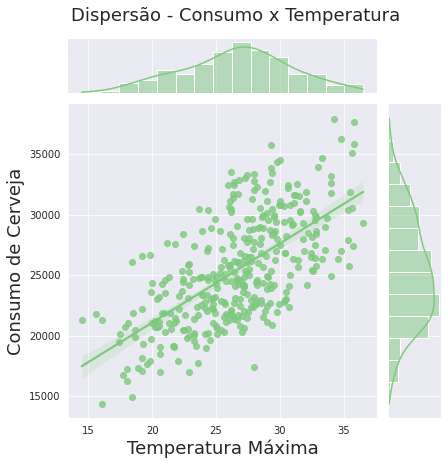

In [16]:
ax = sns.jointplot(x='temp_max', y='consumo', data=dados, kind='reg')
ax.fig.suptitle('Dispersão - Consumo x Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels('Temperatura Máxima', 'Consumo de Cerveja', fontsize=18)

### lmplot
Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.

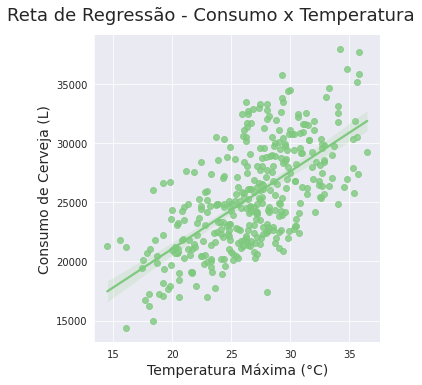

In [17]:
ax = sns.lmplot(x='temp_max', y='consumo', data=dados)
ax.fig.suptitle('Reta de Regressão - Consumo x Temperatura', fontsize=18, y=1.05)
ax.set_xlabels('Temperatura Máxima (°C)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (L)', fontsize=14)

A reta de regressão indica que quanto maior a temperatura máxima, maior será o consumo de cerveja.

#### Adicionando uma terceita variável na análise

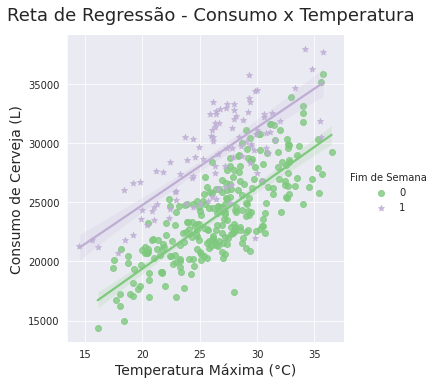

In [18]:
# Fim de semana
ax = sns.lmplot(x='temp_max', y='consumo', data=dados, hue='fds', markers=['o', '*'], legend=False)
ax.fig.suptitle('Reta de Regressão - Consumo x Temperatura', fontsize=18, y=1.05)
ax.set_xlabels('Temperatura Máxima (°C)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (L)', fontsize=14)
ax.add_legend(title='Fim de Semana')

No gráfico acima os dados foram separados de maneira visual entre os que eram referentes ao final de semana e os que não. Com isso, é possível ver que, de fato, o consumo de cerveja nos finais de semana é bem superior do que nos dias de semana.

## Estimando um Modelo de Regressão Linear para o Consumo

A partir de uma análise de regressão é feito um estudo da dependência de uma variável (variável dependente) em relação a uma ou mais variáveis (variáveis explicativas), com o objetivo de estimar e/ou prever um valor médio para a variável dependente em termos dos valores conhecidos ou fixados das vairáveis explicativas.

In [19]:
# Armazenando o consumo de cerveja em um Series
y = dados['consumo']

In [20]:
# Armazendo as variáveis explicativas em um DataFrame
X = dados[['temp_max', 'chuva', 'fds']]

Na escolha das variáveis explicativas, em relação as temperaturas, foi necessário escolher a considerada mais relevante, que causa mais impacto, no maior consumo de cerveja ou não, porque se deixasse as três o modelo teria três variáveis diferentes para descrever a mesma coisa (temperatura). A justificativa da escolha da temperatura máxima é devido a sua maior correlação com o consumo, conforme indica a matriz de correlação.

### Separando os dados de treino e de teste

A separação em dados de treino e teste deve ser feita para conseguir avaliar o desempenho do modelo. Não pode treinar e testar o modelo com os mesmo dados, porque o modelo já vai conhecer os dados inserido, por isso, temos que testá-lo com dados que ele nunca viu para poder medir o seu desempenho real. 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

É necessário colocar um random_state para garantir a repetibilidade do modelo, caso contrário, toda vez que rodar o programa serão selecionado dados de treino e teste diferentes.

In [22]:
# Tamanho dos arquivos 
display('X_train = {}'.format(X_train.shape))
display('X_test = {}'.format(X_test.shape))

'X_train = (255, 3)'

'X_test = (110, 3)'

### Instanciando a classe LinearRegression()

In [23]:
modelo = LinearRegression()

### Treinando o modelo

In [24]:
modelo.fit(X_train, y_train)

LinearRegression()

### Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de treino

**O que é o coeficiente de determinação?**

É uma medida que diz quanto a linha de regressão se ajusta aos dados, sendo que o seu valor varia entre 0 e 1 e quanto mais próximo de 1, mais a linha está ajustada aos dados.

In [25]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.73


### Avaliando o modelo com os dados de teste

#### Previsões

In [26]:
y_previsto = modelo.predict(X_test)

#### Coeficiente de determinação para as previsões do modelo

In [27]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


Nesse caso, está sendo avaliando o quanto os valores que foram previstos pelo modelo estão próximos dos valores reais, que são os dados de teste.

## Obtendo previsões pontuais

In [28]:
# Dados de entrada
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


In [29]:
# Gerando previsão pontual
modelo.predict(entrada)[0]

26094.901775262017

### Criando um simulador simples

In [30]:
temp_max = 40
chuva = 0
fds = 1
entrada = [[temp_max, chuva, fds]]

print('{} litros'.format(modelo.predict(entrada)[0].round(2)))

38742.53 litros


## Interpretação dos Coeficientes Estimados

### Obtendo o intercepto do modelo

**O que é intercepto?**

O intercepto representa o efeito médio no consumo de cerveja tendo todas as variáveis explicativas excluídas do modelo, em outras palavras, independentemente de qual for a temperatura máxima, se choveu ou não e se é fim de semana ou não, retorna o consumo de cerveja esperado. Na prática, os valores de temperatura máxima, chuva e final de semana serão iguais a zero.

In [31]:
modelo.intercept_

5951.976339312445

### Obtendo os coeficientes de regressão

**O que são os coeficientes de regressão?**

São conhecidos também como coeficientes parciais angulares. Mede o efeito de cada uma das variáveis explicativas individualmente na variação do valor de Y. Para ficar mais claro, se deseja saber o coeficiente de regressão da temperatura máxima, os valores de chuva e final de semana permanecerão constantes e será avaliado o efeito em Y variando em uma unidade somente a temperatura máxima.

In [32]:
# Os coeficiente estão na seguinte ordem -> temp_max, chuva, fds
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [33]:
# Para confirmar se a ordem está correta
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

### Criando um DataFrame para armazenar os coeficientes do modelo

In [34]:
# Lista com os nomes das variáveis
index = ['Intecepto', 'Temperatura Máxima', 'Chuva', 'Fim de Semana']
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intecepto,5951.976339
Temperatura Máxima,684.736759
Chuva,-60.782435
Fim de Semana,5401.083339


A partir do DataFrame criado apresentado os coeficientes do modelo, chega-se as seguintes conclusões:


*   Se o efeito das variáveis explicativas for excluido o efeito médio no consumo de cerveja seria de 5951,97 litros;
*  Se os valores de chuva e final de semana forem constantes, o aumento de 1°C na temperatura máxima, geraria um variação média no consumo de cerveja de 684,74 litros;
*  Se os valores de temperatura máxima e final de semana forem constantes, o aumento de 1 mm na chuva, geraria um variação média no consumo de cerveja de -60,78 litros;
*  Se os valores de temperatura máxima e chuva forem constantes, o fato de ser final de semana geraria um variação média no consumo de cerveja de 5401,08 litros.








## Análises Gráficas das Previsões do Modelo

### Gráfico de dispersão entre valor estimado e valor real

In [35]:
# Previsão do modelo com os dados de treino
y_previsto_train = modelo.predict(X_train)

Text(0, 0.5, 'Real')

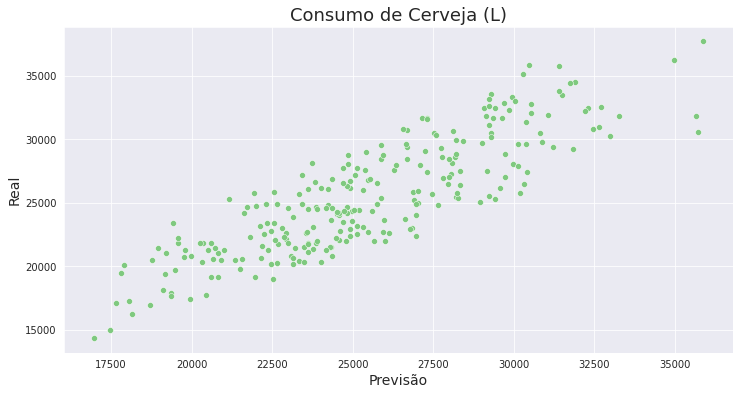

In [36]:
# Gráfico de dispersão entre valor estimado e valor real
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja (L)', fontsize=18)
ax.set_xlabel('Previsão', fontsize=14)
ax.set_ylabel('Real', fontsize=14)

Através da análise gráfica vemos que os ajustes são melhores no começo, mas para consumos maiores, os pontos estão mais dispersos, demonstrando que o ajuste é menos adequado para esses valores.

### Gráfico de dispersão entre valor estimado e resíduos

**O que é resíduo?**

É a diferença entre o valor real e o valor previsto.

O gráfico de dispersão entre valor estimado e resíduo é um método informal de verificação da hipótese de variância constante de resíduos (homocedasticidade), a qual descreve que o erro (resíduo) é o mesmo em todos os valores das variáveis independentes, ou seja, em todos os pontos, a diferença entre o valor real e o valor previsto é o mesmo. Na prática, a variância não pode ser constante, porque isso seria um problema, mas ela deve ficar dentro de um intervalo.

In [37]:
residuo = y_train - y_previsto_train

Text(0, 0.5, 'Resíduos')

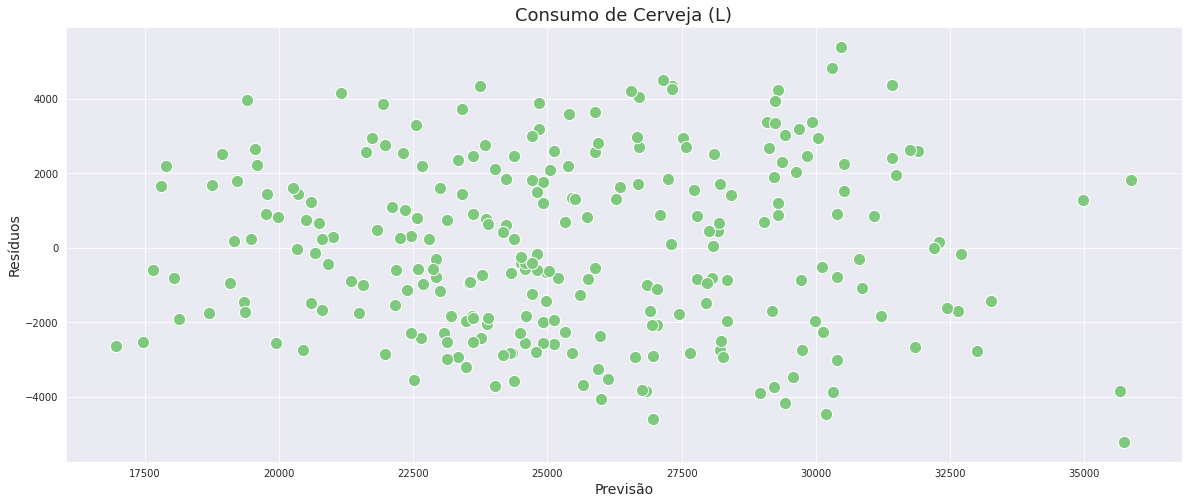

In [38]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
# s -> tamanho dos marcadores
ax.figure.set_size_inches(20, 8)
ax.set_title('Consumo de Cerveja (L)', fontsize=18)
ax.set_xlabel('Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)

### Gráfico de dispersão entre valor estimado e resíduos ao quadrado

Text(0, 0.5, 'Resíduos')

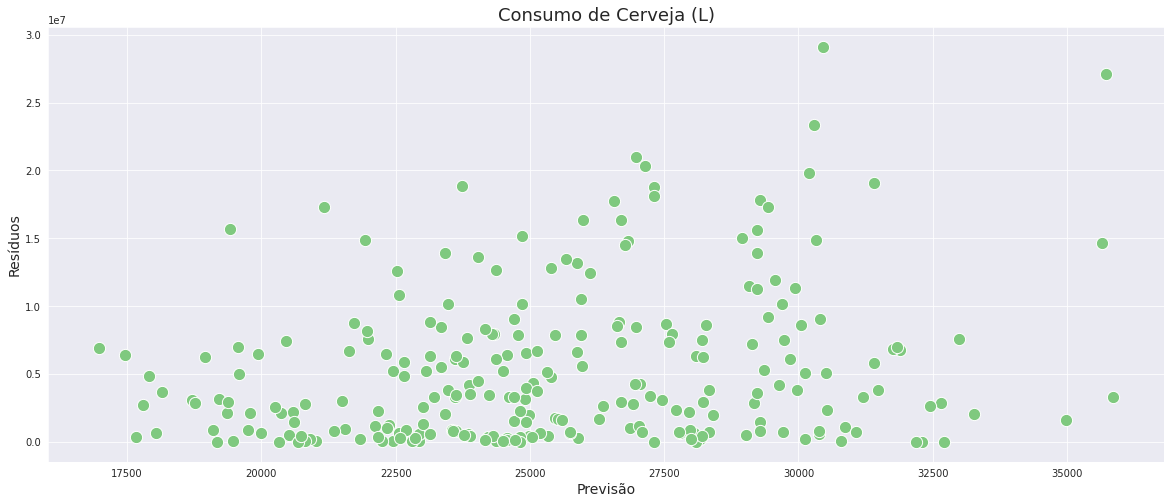

In [39]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo ** 2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Consumo de Cerveja (L)', fontsize=18)
ax.set_xlabel('Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)

### Distribuição de frequências dos resíduos

Text(0.5, 0, 'Resíduo')

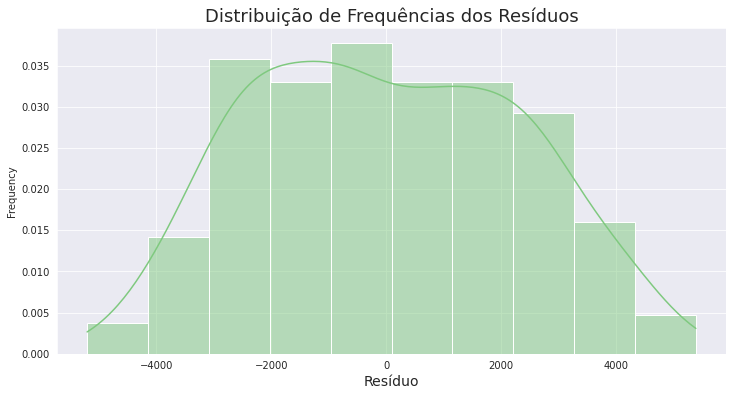

In [40]:
ax = sns.histplot(residuo, kde=True, stat='frequency')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Resíduo', fontsize=14)

## Comparando Modelos

O modelo anterior foi estimado utilizando a temperatura máxima, porque, como já explicado anteriormente, tem uma correlação maior com o consumo. Porém, para ter um comparativa, vamos estimar um novo modelo utilizando a temperatura média em seu lugar.

In [41]:
# Variáveis explicativas
X2 = dados[['temp_media', 'chuva', 'fds']]

In [42]:
# Divindo em dados de treino e teste
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

In [43]:
# Instanciando a classe LinearRegression()
modelo_2 = LinearRegression()

In [44]:
# Treinando o modelo
modelo_2.fit(X2_train, y2_train)

LinearRegression()

### Comparação entre os coeficientes de determinação (R²)

In [45]:
print('Modelo com Temperatura Média')
print('R² = {}'.format(modelo_2.score(X2_train, y2_train).round(2)))

Modelo com Temperatura Média
R² = 0.66


In [46]:
print('Modelo com Temperatura Máxima')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com Temperatura Máxima
R² = 0.73


O coeficiente de determinação do modelo com temperatura máxima é maior, indicando que a linha de regressão se ajusta melhor a esses dados.

### Coeficiente de determinação (R²) para as previsões dos dois modelos

In [47]:
# Previsões
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

In [48]:
print('Modelo com Temperatura Média')
print('R² = {}'.format(metrics.r2_score(y2_test, y_previsto_2).round(2)))

Modelo com Temperatura Média
R² = 0.66


In [49]:
print('Modelo com Temperatura Máxima')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

Modelo com Temperatura Máxima
R² = 0.69


Apesar da diferença ser mínima, o modelo com temperatura máxima tem os valores previstos mais próximos dos valores reais que o modelo com temperatura média.

## Outras métricas de regressão

**Erro Quadrático Médio (EQM)**

Média dos quadrados dos erros. Quanto melhor for ajuste, menor será o EQM.

**Raíz do Erro Quadrático Médio**

Raíz quadrada da média dos quadrados dos erros. Novamente, quanto melhor o ajuste, menor será o seu valor.

### Métricas do modelo com Temperatura Média

In [50]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


### Métricas do modelo com Temperatura Máxima

In [51]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69


Comparando os dois modelos, chega-se a conclusão de o que mais adequado é da Temperatura Máxima.

## Salvando e Carregando o Modelo Estimado

### Criando um simulador simples

In [52]:
# Dados de entrada
entrada = X_test[0:1]

In [53]:
# Previsão pontual
modelo.predict(entrada)[0]

26094.901775262017

In [54]:
# Simulador
temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]

print('{0: .2f} litros'.format(modelo.predict(entrada)[0]))

 26094.90 litros


### Salvando o modelo estimado

Para salvar o modelo estimado será utilizado o módulo pickle, o qual implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.

O **Pickle** é útil para salvar identificadores e configurações, ou seja, ele salva um arquivo para recuperação posterior.

Fonte: https://www.greelane.com/pt/ci%c3%aancia-tecnologia-matem%c3%a1tica/ci%c3%aancia-da-computa%c3%a7%c3%a3o/using-pickle-to-save-objects-2813661/

In [55]:
# wb -> abre pelo método write binary
# Abre o output
output = open('modelo_consumo_cerveja', 'wb')
# Preenche o output
pickle.dump(modelo, output)
# Fecha o output
output.close()

Com isso, o modelo feito pode ser reutilizado em outros projetos, sendo carregado em outros notebooks.